### Name- Rahul Singh

### Task4 To Explore Decision Tree classifier and visualize it graphically.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
dataset= pd.read_csv('Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Remove the first Id column from the dataset
dataset.drop('Id',axis=1,inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Data Visualization

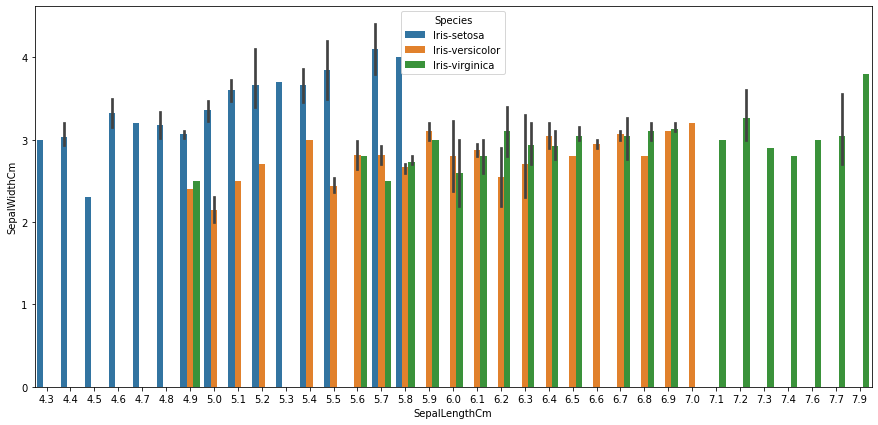

In [8]:
plt.figure(figsize=(15,7))
sns.barplot(dataset.SepalLengthCm,dataset.SepalWidthCm,hue=dataset.Species);

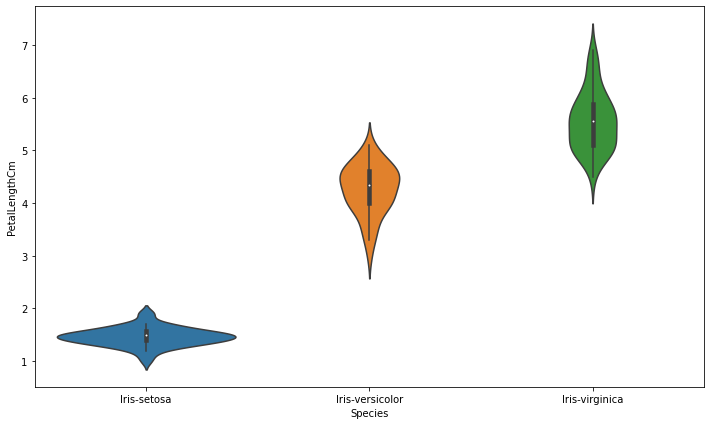

In [9]:
plt.figure(figsize=(12,7))
sns.violinplot(dataset.Species,dataset.PetalLengthCm);

#### Data Spliting

In [10]:
x= dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
# Feature Scaling
sc_x=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

### Model Building

In [12]:
# Fitting Decision Tree Classification to the Training set
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
# predicting the Test set results
y_pred=classifier.predict(x_test)

In [14]:
# making the confusion matrix
cm= confusion_matrix(y_test,y_pred)

In [15]:
cm

array([[11,  0,  0],
       [ 0,  9,  4],
       [ 0,  0,  6]], dtype=int64)

In [16]:
ac=accuracy_score(y_test,y_pred)
print('the model accuracy score ',ac*100)

the model accuracy score  86.66666666666667


In [17]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.69      0.82        13
 Iris-virginica       0.60      1.00      0.75         6

       accuracy                           0.87        30
      macro avg       0.87      0.90      0.86        30
   weighted avg       0.92      0.87      0.87        30



### Tree visualizatin

In [18]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= -0.56
|   |--- class: Iris-setosa
|--- feature_3 >  -0.56
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_2 <= 0.92
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  0.92
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: Iris-virginica



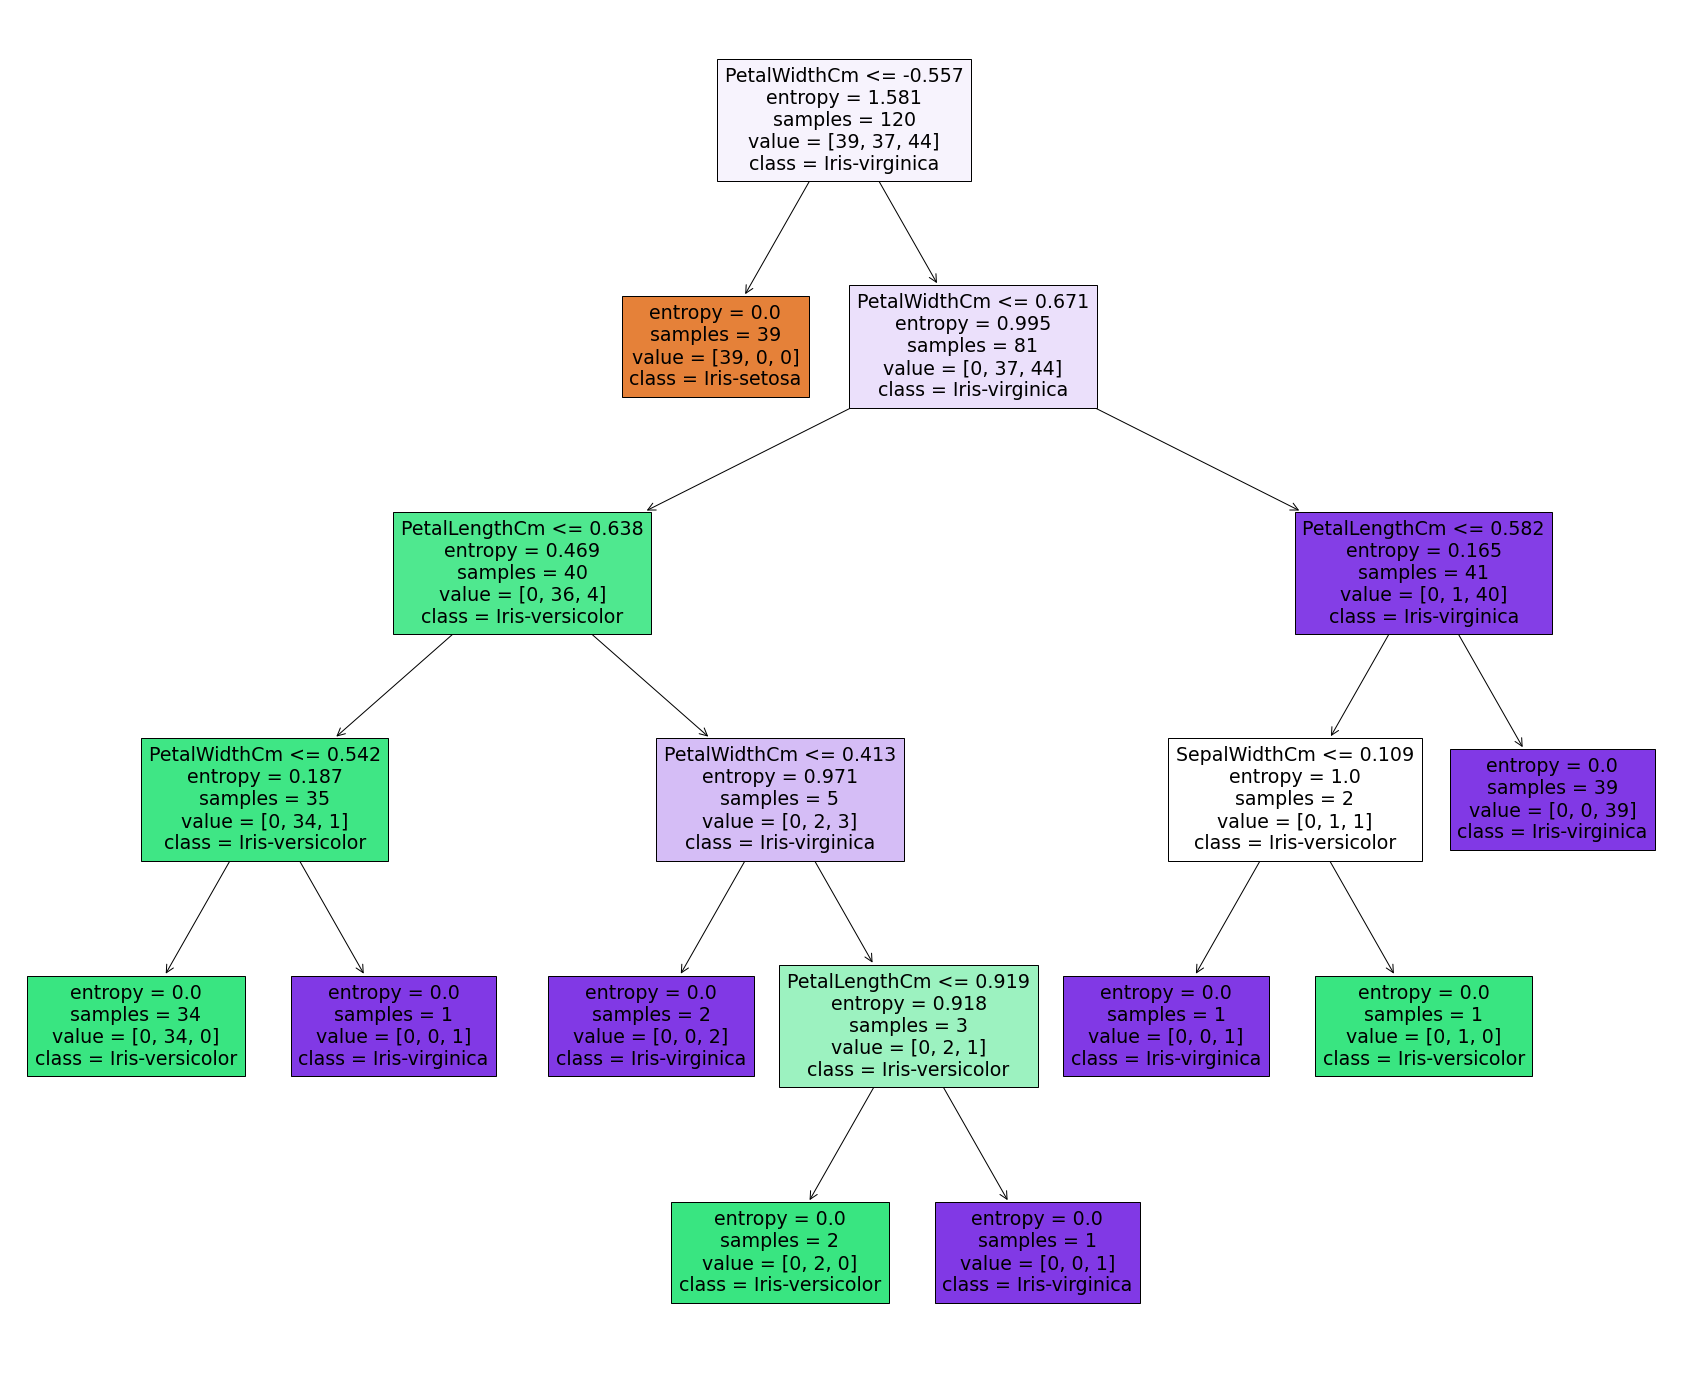

In [19]:
fig = plt.figure(figsize=(30,25))
_=tree.plot_tree(classifier,feature_names=dataset.columns.drop('Species'),class_names=dataset.Species.unique(),filled=True)

### Prediction 

In [20]:
#input the value
sepal_ln=4.6
sepal_wd=2.3
petal_ln=3.2
petal_wd=1.2


In [21]:
species_pred=classifier.predict([[sepal_ln,sepal_wd,petal_ln,petal_wd]])
print(species_pred)

['Iris-virginica']


#### ==================================================================================================================